# _This is a very short simple analysis of Covid-19 impact on airport traffic locations in the North America continent and Australia._
## The dataset was obtained from Kaggle.com


In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as px
%matplotlib inline 

In [7]:
df = pd.read_csv('covid_impact_on_airport_traffic.csv')

In [8]:
df.head(5)

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,03-04-20,1,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,13-04-20,1,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,10-07-20,1,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,02-09-20,1,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,31-10-20,1,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [9]:
df.tail(5)

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
7242,Daily,05-06-20,1,Seattle-Tacoma International,80,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7243,Daily,03-10-20,1,Seattle-Tacoma International,55,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7244,Daily,16-07-20,1,Seattle-Tacoma International,76,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7245,Daily,31-07-20,1,Seattle-Tacoma International,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7246,Daily,30-08-20,1,Seattle-Tacoma International,68,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."


In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AggregationMethod  7247 non-null   object
 1   Date               7247 non-null   object
 2   Version            7247 non-null   int64 
 3   AirportName        7247 non-null   object
 4   PercentOfBaseline  7247 non-null   int64 
 5   Centroid           7247 non-null   object
 6   City               7247 non-null   object
 7   State              7247 non-null   object
 8   ISO_3166_2         7247 non-null   object
 9   Country            7247 non-null   object
 10  Geography          7247 non-null   object
dtypes: int64(2), object(9)
memory usage: 622.9+ KB


,Version,PercentOfBaseline
count,7247.0,7247.000000
mean,1.0,66.651442
std,0.0,22.134433
min,1.0,0.000000
25%,1.0,53.000000
50%,1.0,67.000000
75%,1.0,84.000000
max,1.0,100.000000


In [11]:
print("Data shape :",df.shape)

Data shape : (7247, 11)


### Checking for any empty values


In [12]:
df.isnull().sum()

AggregationMethod    0
Date                 0
Version              0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
Geography            0
dtype: int64

In [13]:
len(df['State'].unique())

23

In [14]:
len(df['Country'].unique())

4

### So in total there are 23 different states spread accross 4 countries


In [15]:
df.duplicated(keep = 'first').sum()

0

In [16]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)

In [17]:
min(df['Date']), max(df['Date'])

(Timestamp('2020-03-16 00:00:00'), Timestamp('2020-12-02 00:00:00'))

### This shows the data has been updated only up till Dec 2nd 2020 

In [18]:
df = df.sort_values(by="Date")
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head(3)

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,Month
302,Daily,2020-03-16,1,Santiago International Airport,96,POINT(-70.7942372739446 -33.3907265266744),Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ...",3
1713,Daily,2020-03-16,1,Halifax International,72,POINT(-63.5116720134583 44.8830168353507),Halifax,Nova Scotia,CA-NS,Canada,"POLYGON((-63.5266613960266 44.8984438169036, -...",3
3963,Daily,2020-03-16,1,Hartsfield-Jackson Atlanta International,92,POINT(-84.4279188822754 33.6410758198944),College Park,Georgia,US-GA,United States of America (the),"POLYGON((-84.4299745559692 33.657852680999, -8...",3


In [19]:
import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [20]:
def cut_long(point):
    long, _ = point[6:-1].split(" ")
    return float(long)
def cut_lat(point):
    _, lat = point[6:-1].split(" ")
    return float(lat)

In [22]:
df['long'] = df['Centroid'].map(cut_long)
df['lat'] = df['Centroid'].map(cut_lat)
df.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,Month,long,lat
302,Daily,2020-03-16,1,Santiago International Airport,96,POINT(-70.7942372739446 -33.3907265266744),Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ...",Mar,-70.794237,-33.390727
1713,Daily,2020-03-16,1,Halifax International,72,POINT(-63.5116720134583 44.8830168353507),Halifax,Nova Scotia,CA-NS,Canada,"POLYGON((-63.5266613960266 44.8984438169036, -...",Mar,-63.511672,44.883017
3963,Daily,2020-03-16,1,Hartsfield-Jackson Atlanta International,92,POINT(-84.4279188822754 33.6410758198944),College Park,Georgia,US-GA,United States of America (the),"POLYGON((-84.4299745559692 33.657852680999, -8...",Mar,-84.427919,33.641076
2989,Daily,2020-03-16,1,Los Angeles International,98,POINT(-118.404993180627 33.941369379328),Los Angeles,California,US-CA,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -...",Mar,-118.404993,33.941369
5701,Daily,2020-03-16,1,McCarran International,68,POINT(-115.14888081287 36.082853976328),Paradise,Nevada,US-NV,United States of America (the),"POLYGON((-115.158487558365 36.1007120735771, -...",Mar,-115.148881,36.082854


In [23]:
df = df.drop(['AggregationMethod', 'Version', 'ISO_3166_2', 'Centroid'], axis = 1)

In [24]:
df.head(5)

,Date,AirportName,PercentOfBaseline,City,State,Country,Geography,Month,long,lat
302,2020-03-16,Santiago International Airport,96,Santiago,Santiago Province,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ...",Mar,-70.794237,-33.390727
1713,2020-03-16,Halifax International,72,Halifax,Nova Scotia,Canada,"POLYGON((-63.5266613960266 44.8984438169036, -...",Mar,-63.511672,44.883017
3963,2020-03-16,Hartsfield-Jackson Atlanta International,92,College Park,Georgia,United States of America (the),"POLYGON((-84.4299745559692 33.657852680999, -8...",Mar,-84.427919,33.641076
2989,2020-03-16,Los Angeles International,98,Los Angeles,California,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -...",Mar,-118.404993,33.941369
5701,2020-03-16,McCarran International,68,Paradise,Nevada,United States of America (the),"POLYGON((-115.158487558365 36.1007120735771, -...",Mar,-115.148881,36.082854


In [25]:
df = df.replace(['United States of America (the)'], 'USA')
df.head()

,Date,AirportName,PercentOfBaseline,City,State,Country,Geography,Month,long,lat
302,2020-03-16,Santiago International Airport,96,Santiago,Santiago Province,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ...",Mar,-70.794237,-33.390727
1713,2020-03-16,Halifax International,72,Halifax,Nova Scotia,Canada,"POLYGON((-63.5266613960266 44.8984438169036, -...",Mar,-63.511672,44.883017
3963,2020-03-16,Hartsfield-Jackson Atlanta International,92,College Park,Georgia,USA,"POLYGON((-84.4299745559692 33.657852680999, -8...",Mar,-84.427919,33.641076
2989,2020-03-16,Los Angeles International,98,Los Angeles,California,USA,"POLYGON((-118.439612388611 33.9517616366508, -...",Mar,-118.404993,33.941369
5701,2020-03-16,McCarran International,68,Paradise,Nevada,USA,"POLYGON((-115.158487558365 36.1007120735771, -...",Mar,-115.148881,36.082854


In [115]:
df_counts = df.groupby('Country').agg(['sum','mean','std'])
df_counts

Version           PercentOfBaseline                      
              sum mean  std               sum       mean        std
Country                                                            
Australia     257    1  0.0              9702  37.750973  21.799160
Canada       2311    1  0.0            178893  77.409347  22.517052
Chile         238    1  0.0              8157  34.273109  14.906353
USA          4441    1  0.0            286271  64.460932  18.081394

#### Below are some various plots to show the proportion of trips compared to the baseline

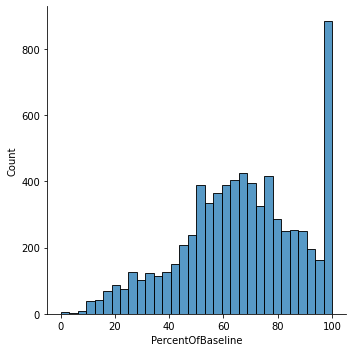

In [26]:
sns.displot(df['PercentOfBaseline'])

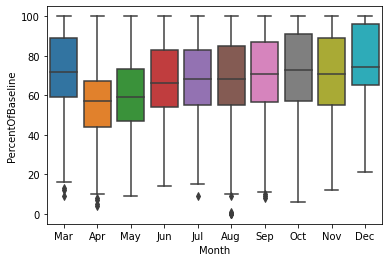

In [27]:
fig, ax = plt.subplots()
sns.boxplot(x='Month',y='PercentOfBaseline',data=df,ax=ax)
plt.show()

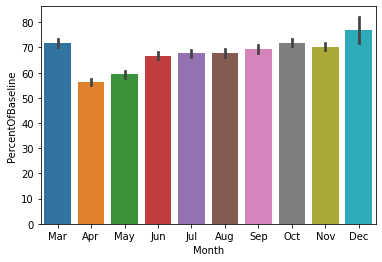

In [28]:
fig, ax = plt.subplots()
sns.barplot(x='Month',y='PercentOfBaseline',data=df,ax=ax)
plt.show()

#### These plots below are for comparison among the four countries

<AxesSubplot:ylabel='Country'>

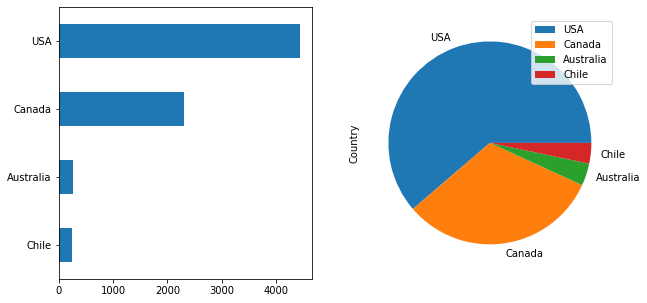

In [29]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
df.Country.value_counts(ascending=True).plot(kind='barh')
plt.subplot(1,2,2)
df.Country.value_counts().plot(kind='pie', legend = True)

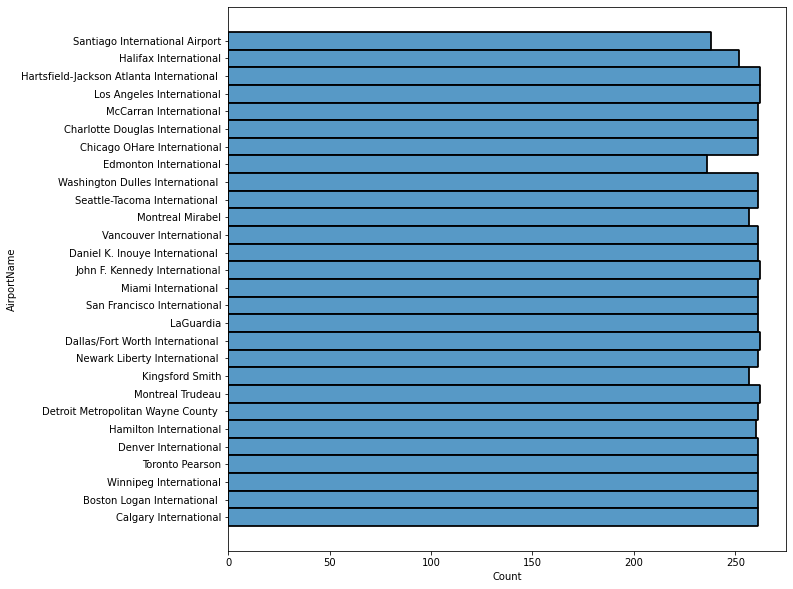

In [30]:
plt.figure(figsize=(10,10))
fig = sns.histplot(y='AirportName',data=df)

#### Number of records are about the same for each airport


In [39]:
df_airport_mean = df.groupby(["AirportName"]).mean()
df_airport_mean = df.reset_index()
df_airport_mean.head()

,index,Date,AirportName,PercentOfBaseline,City,State,Country,Geography,Month,long,lat
0,302,2020-03-16,Santiago International Airport,96,Santiago,Santiago Province,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ...",Mar,-70.794237,-33.390727
1,1713,2020-03-16,Halifax International,72,Halifax,Nova Scotia,Canada,"POLYGON((-63.5266613960266 44.8984438169036, -...",Mar,-63.511672,44.883017
2,3963,2020-03-16,Hartsfield-Jackson Atlanta International,92,College Park,Georgia,USA,"POLYGON((-84.4299745559692 33.657852680999, -8...",Mar,-84.427919,33.641076
3,2989,2020-03-16,Los Angeles International,98,Los Angeles,California,USA,"POLYGON((-118.439612388611 33.9517616366508, -...",Mar,-118.404993,33.941369
4,5701,2020-03-16,McCarran International,68,Paradise,Nevada,USA,"POLYGON((-115.158487558365 36.1007120735771, -...",Mar,-115.148881,36.082854


In [51]:
import folium
import plotly.express as px
fig = px.scatter_mapbox(df_airport_mean, lat = 'lat', lon = 'long', hover_name='AirportName', hover_data = ['PercentOfBaseline'], size='PercentOfBaseline')
fig.update_layout(mapbox_style = 'stamen-terrain')

